In [7]:
#Instalamos todas las librerias a utilizar

import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import linalg as LA
from numpy.linalg import inv
import time

#Primero cargaremos las matrices y vectores

#Matrices

A10=np.load('A10.npy')
A100=np.load('A100.npy')
A1000=np.load('A1000.npy')

#Vectores

b10=np.load('b10.npy')
b100=np.load('b100.npy')
b1000=np.load('b1000.npy')

In [8]:
#GRADIENTE PROXIMAL CON NORMA 2

#Programación del oraculo de proyección en norma 2 sobre la bola unitaria de norma 1

def oraculo_de_proyeccion(x,tol):
    y= LA.norm(x,1)
    if y <= 1:
        return x
    else:
        d=len(x)
        lista=[]
        for i in range(d):
            lista.append(abs(float(x[i])))
        a=0
        b=2*max(lista)
        p_a=0
        p_b=0
        l_ideal=-5
        for k in range(d):
            u_a=max((abs(float(x[k]))-a/2),0)
            u_b=max((abs(float(x[k]))-b/2),0)
            p_a = p_a + u_a
            p_b = p_b + u_b
        p_a = p_a - 1
        p_b = p_b - 1
        if p_a ==0:
            l_ideal=a
        if p_b==0:
            l_ideal=b
        else:
            error=LA.norm(x,1)-1
            while error>tol:
                c = (a+b)/2
                f_c = 0
                f_a = 0
                f_b = 0
                for j in range(d):
                    t_c = max((abs(float(x[j]))-c/2),0)
                    t_a = max((abs(float(x[j]))-a/2),0)
                    t_b = max((abs(float(x[j]))-b/2),0)
                    f_c=f_c+t_c
                    f_a=f_a+t_a
                    f_b=f_b+t_b
                f_c = f_c-1
                f_a = f_a-1
                f_b = f_b-1
                if f_c == 0:
                    l_ideal=c
                if f_c > 0:
                    a=c
                if f_c < 0:
                    b=c
                error=abs(f_c)
            l_ideal=c
        lista_final=[]
        for w in range(d):
            lista_final.append(max((2*abs(float(x[w])) - l_ideal)/2,0))
        lista_x=[]
        for e in range(d):
            lista_x.append([(lista_final[e]*np.sign(float(x[e])))])
        lista_x = np.matrix(lista_x)
    return lista_x

In [9]:
#Programación del gradiente proximal usando el oraculo ya programado

def BacktrackingMethodNorma2(A,b,T,tol):
    
    eta=1
    
    #Se elije un vector inicial aleatorio. Por simplicidad se elegirá b
    x=b
    
    #Proyecto de inmediato al primer vector (Para que este dentro del dominio, es decir la bola unitaria de norma 1)
    x=oraculo_de_proyeccion(x,tol)
    
    l_d_e=[]
    
    l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
    
    lista_t=[]
    lista_t.append(0)
    contador=0
    lista_x=[]
    lista_x.append(x)
    
    for t in range(T):
        t=time.perf_counter()
        v=x
        x=x-eta*(np.dot(np.dot(np.transpose(A),A),x) - np.dot(np.transpose(A),b))
        x=oraculo_de_proyeccion(x,tol)
        
        f1 = (1/2)*((LA.norm(np.dot(A,x)-b,2))**2)
        
        f2 = (1/2)*((LA.norm(np.dot(A,v)-b,2))**2)
        
        p_i = float(np.dot(np.transpose((np.dot(np.dot(np.transpose(A),A),v) - np.dot(np.transpose(A),b))),x-v))
        
        n_i = (1/(2*eta))*((LA.norm(x-v))**2)
        
        z=(f1<=f2+p_i+n_i)
        
        if z==True:
            l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
        else:
            x=v
            l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
            eta=eta/2
        t1=time.perf_counter()-t
        contador=contador+t1
        lista_t.append(contador)
        lista_x.append(x)
    lista_final=[]
    lista_final.append(l_d_e)
    lista_final.append(lista_t)
    lista_final.append(lista_x)
    return lista_final

In [10]:
#GRADIENTE PROXIMAL CON NORMA 1

#Primero programaremos el oraculo de proyección en norma 1 sobre la bola unitaria de norma 1

def oraculo_de_proyeccion_norma_1(x):
    y=LA.norm(x,1)
    if y<=1:
        return x
    else:
        z=x/LA.norm(x,1)
        return z

In [44]:
#Programación del gradiente proximal con norma 1 usando el oraculo

def BacktrackingMethodNorma1(A,b,T):
    
    eta=1
    
    #Se elije un vector inicial aleatorio. Por simplicidad se elegirá b
    x=b
    
    #Proyecto de inmediato al primer vector (Para que este dentro del dominio, es decir la bola unitaria de norma 1)
    x=oraculo_de_proyeccion_norma_1(x)
    
    l_d_e=[]
    
    l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
    
    lista_t=[]
    lista_t.append(0)
    contador=0
    lista_x=[]
    lista_x.append(x)
    
    for t in range(T):
        t=time.perf_counter()
        v=x
        x=x-eta*(np.dot(np.dot(np.transpose(A),A),x) - np.dot(np.transpose(A),b))
        x=oraculo_de_proyeccion_norma_1(x)
        
        f1 = (1/2)*((LA.norm(np.dot(A,x)-b,2))**2)
        
        f2 = (1/2)*((LA.norm(np.dot(A,v)-b,2))**2)
        
        p_i = float(np.dot(np.transpose((np.dot(np.dot(np.transpose(A),A),v) - np.dot(np.transpose(A),b))),x-v))
        
        n_i = (1/(2*eta))*((LA.norm((x-v),2))**2)
        
        z=(f1<=f2+p_i+n_i)
        
        if z==True:
            l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
        else:
            x=v
            l_d_e.append((1/2)*((LA.norm(np.dot(A,x)-b,2))**2))
            eta=eta/2
        t1=time.perf_counter()-t
        contador=contador+t1
        lista_t.append(contador)
        lista_x.append(x)
    lista_final=[]
    lista_final.append(l_d_e)
    lista_final.append(lista_t)
    lista_final.append(lista_x)
    return lista_final

In [45]:
#PROGRAMACION DEL METODO DEL GRADIENTE CONDICIONAL

def gradiente_condicional(A,b,T):
    
    #Se elige vector inicial que pertenezca al dominio
    #En nuestro caso elegiremos el vector canonico e1
    
    x_0=[[1]]
    
    for u in range(len(b)-1):
        x_0.append([0])
        
    x_0=np.array(x_0)
    
    x_t=x_0
    
    #Recopilaremos los valores de la función objetivo (Es decir los errores de los minimos cuadrado al cuadrado dividido en 2)
    
    lista=[]
    
    lista.append((1/2)*((LA.norm(np.dot(A,x_t)-b))**2))
    
    lista_t=[]
    lista_t.append(0)
    contador=0
    lista_x=[]
    lista_x.append(x_0)
    
    for t in range(T):
        
        t=time.perf_counter()
        
        #Primero calculamos el gradiente
        
        g_t=np.dot((np.dot(np.transpose(A),A)),x_t)-np.dot(np.transpose(A),b)
        
        #Calculamos la posicion de la componente con mayor valor absoluto
        
        m=max(abs(g_t))
        
        pos=-1
        
        for i in range(len(g_t)):
            if abs(g_t[i,0])==m:
                pos=i
        
        #Calculamos el vector z_t
        
        z_t=[]
        
        for j in range(len(g_t)):
            if j==pos:
                l=[]
                l.append(-np.sign(g_t[j,0]))
                z_t.append(l)
            else:
                z_t.append([0])
        
        z_t=np.array(z_t)
        
        #Calculamos el eta_t
        
        eta_t=2/(t+2)
        
        #Agregamos el valor de la función objetivo de esta iteración
        
        lista.append((1/2)*((LA.norm(np.dot(A,x_t)-b))**2))
        
        x_t=x_t+eta_t*(z_t-x_t)
        
        lista_x.append(x_t)
        
        t1=time.perf_counter()-t
        contador=contador+t1
        lista_t.append(contador)

    lista1=[]
    
    lista1.append(x_t)
    
    lista1.append(lista)
    
    lista1.append(lista_t)
    
    lista1.append(lista_x)
        
    return lista1

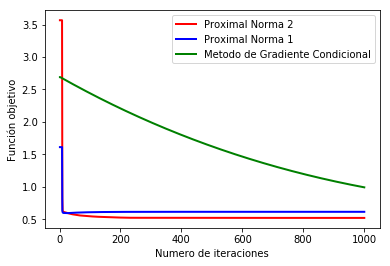

In [46]:
#CASO A10, b10

#Graficaremos (1/2)*[(||Ax-b||_2)**2] que es valor de la función objetivo

#Numero de iteraciones
T=1000

#Nivel de tolerancia
tol=10**(-7)

#Creamos el vector para graficar el eje X

u=[]

for j in range(T+1):
    u.append(j+1)
    
#1)Metodo del gradiente proximal con norma 2 usando backtracking con el nivel de tolerancia indicado: ROJO

y1=BacktrackingMethodNorma2(A10,b10,T,tol)[0]

#2)Metodo del gradiente proximal con norma 1 usando backtracking: AZUL

y2=BacktrackingMethodNorma1(A10,b10,T)[0]
    
#3)Metodo del gradiente condicional: VERDE

y3=gradiente_condicional(A10,b10,T)[1]

#Graficamos

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo')
plt.legend(loc='best')
plt.show()

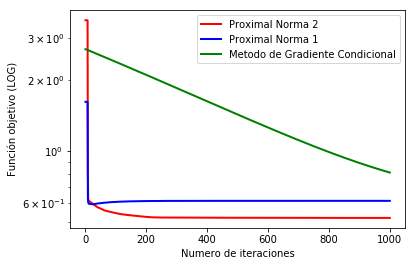

In [24]:
#Ahora se graficara la función objetivo en escala logaritmica

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo (LOG)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [25]:
#Ahora graficaremos para los distintos metodos el costo computacional (tiempo) en función del numero de iteraraciones

#Tiempos del método del gradiente proximal con norma 2

lista_t1=BacktrackingMethodNorma2(A10,b10,T,tol)[1]


#Tiempos del método del gradiente proximal con norma 1

lista_t2=BacktrackingMethodNorma1(A10,b10,T)[1]


#Tiempo del método del gradiente condicional

lista_t3=gradiente_condicional(A10,b10,T)[2]

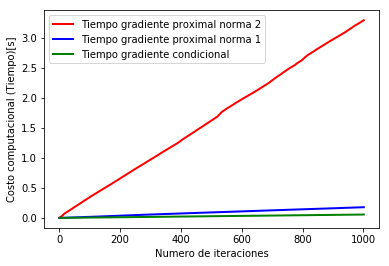

In [27]:
plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional (Tiempo)[s]')
plt.legend(loc='best')
plt.show()

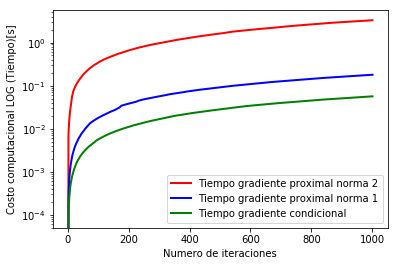

In [29]:
#Ahora graficaremos estos tiempos en escala logaritmica

plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional LOG (Tiempo)[s]')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

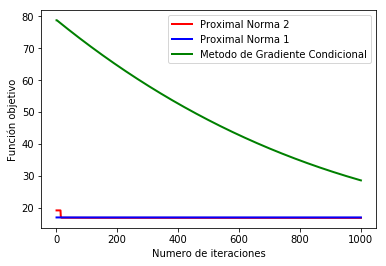

In [30]:
#CASO A100, b100

#Graficaremos (1/2)*[(||Ax-b||_2)**2] que es valor de la función objetivo

#Numero de iteraciones
T=1000

#Nivel de tolerancia
tol=10**(-7)

#Creamos el vector para graficar el eje X

u=[]

for j in range(T+1):
    u.append(j+1)
    
#1)Metodo del gradiente proximal con norma 2 usando backtracking con el nivel de tolerancia indicado: ROJO

y1=BacktrackingMethodNorma2(A100,b100,T,tol)[0]

#2)Metodo del gradiente proximal con norma 1 usando backtracking: AZUL

y2=BacktrackingMethodNorma1(A100,b100,T)[0]
    
#3)Metodo del gradiente condicional: VERDE

y3=gradiente_condicional(A100,b100,T)[1]

#Graficamos

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo')
plt.legend(loc='best')
plt.show()

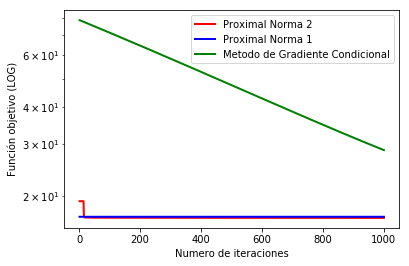

In [31]:
#Ahora se graficara la función objetivo en escala logaritmica

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo (LOG)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [32]:
#Ahora graficaremos para los distintos metodos el costo computacional (tiempo) en función del numero de iteraraciones

#Tiempos del método del gradiente proximal con norma 2

lista_t1=BacktrackingMethodNorma2(A100,b100,T,tol)[1]


#Tiempos del método del gradiente proximal con norma 1

lista_t2=BacktrackingMethodNorma1(A100,b100,T)[1]


#Tiempo del método del gradiente condicional

lista_t3=gradiente_condicional(A100,b100,T)[2]

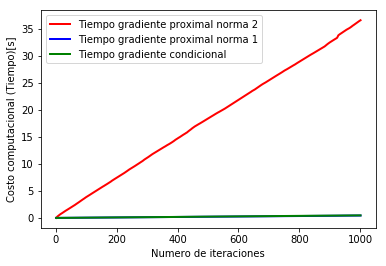

In [33]:
plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional (Tiempo)[s]')
plt.legend(loc='best')
plt.show()

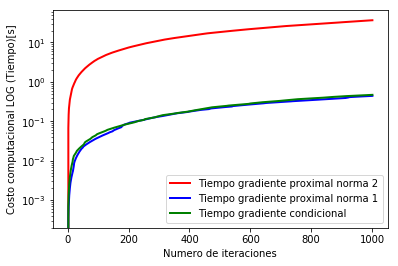

In [34]:
#Ahora graficaremos estos tiempos en escala logaritmica

plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional LOG (Tiempo)[s]')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

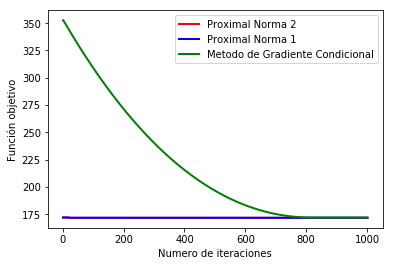

In [35]:
#CASO A1000, b1000

#Graficaremos (1/2)*[(||Ax-b||_2)**2] que es valor de la función objetivo

#Numero de iteraciones
T=1000

#Nivel de tolerancia
tol=10**(-7)

#Creamos el vector para graficar el eje X

u=[]

for j in range(T+1):
    u.append(j+1)
    
#1)Metodo del gradiente proximal con norma 2 usando backtracking con el nivel de tolerancia indicado: ROJO

y1=BacktrackingMethodNorma2(A1000,b1000,T,tol)[0]

#2)Metodo del gradiente proximal con norma 1 usando backtracking: AZUL

y2=BacktrackingMethodNorma1(A1000,b1000,T)[0]
    
#3)Metodo del gradiente condicional: VERDE

y3=gradiente_condicional(A1000,b1000,T)[1]

#Graficamos

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo')
plt.legend(loc='best')
plt.show()

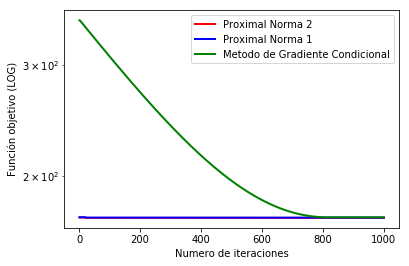

In [37]:
#Ahora se graficara la función objetivo en escala logaritmica

plt.plot(u,y1,color="r", linewidth=2, label='Proximal Norma 2')

plt.plot(u,y2,color="b", linewidth=2, label='Proximal Norma 1')

plt.plot(u,y3,color="g", linewidth=2, label='Metodo de Gradiente Condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Función objetivo (LOG)')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [38]:
#Ahora graficaremos para los distintos metodos el costo computacional (tiempo) en función del numero de iteraraciones

#Tiempos del método del gradiente proximal con norma 2

lista_t1=BacktrackingMethodNorma2(A1000,b1000,T,tol)[1]


#Tiempos del método del gradiente proximal con norma 1

lista_t2=BacktrackingMethodNorma1(A1000,b1000,T)[1]


#Tiempo del método del gradiente condicional

lista_t3=gradiente_condicional(A1000,b1000,T)[2]

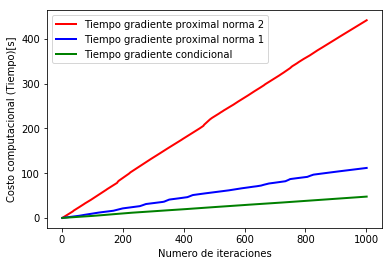

In [39]:
plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional (Tiempo)[s]')
plt.legend(loc='best')
plt.show()

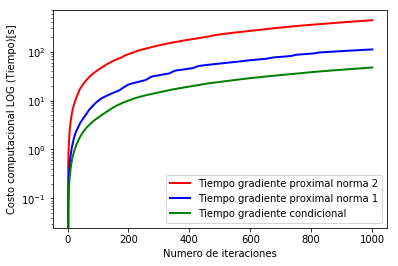

In [40]:
#Ahora graficaremos estos tiempos en escala logaritmica

plt.plot(u,lista_t1,color="r", linewidth=2, label='Tiempo gradiente proximal norma 2')
plt.plot(u,lista_t2,color="b", linewidth=2, label='Tiempo gradiente proximal norma 1')
plt.plot(u,lista_t3,color="g", linewidth=2, label='Tiempo gradiente condicional')

plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo computacional LOG (Tiempo)[s]')
plt.yscale('log')
plt.legend(loc='best')
plt.show()